In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
flight = pd.read_excel('Data_Train.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
flight.shape

(10683, 11)

In [11]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
flight['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

In [13]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
flight.dropna(inplace=True)
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
flight['Journey_Day'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight['Journey_Month'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.month
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
flight['Dep_hour'] = pd.to_datetime(flight.Dep_Time ).dt.hour
flight['Dep_Minute'] = pd.to_datetime(flight.Dep_Time ).dt.minute
flight.head()

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2517023688.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight['Dep_hour'] = pd.to_datetime(flight.Dep_Time ).dt.hour
C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2517023688.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight['Dep_Minute'] = pd.to_datetime(flight.Dep_Time ).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
flight['Arrival_hour'] = pd.to_datetime(flight.Arrival_Time ).dt.hour
flight['Arrival_Minute'] = pd.to_datetime(flight.Arrival_Time ).dt.minute
flight.head()

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\4244514515.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight['Arrival_hour'] = pd.to_datetime(flight.Arrival_Time ).dt.hour
C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\4244514515.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight['Arrival_Minute'] = pd.to_datetime(flight.Arrival_Time ).dt.minute


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
flight.drop(columns=['Dep_Time' , 'Date_of_Journey'],inplace=True)

In [20]:
flight.drop(columns='Arrival_Time',inplace=True)

In [21]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
duration = list(flight.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

In [23]:
flight['Duration_Hour'] = duration_hour
flight['Duration_Minute'] = duration_minute

In [24]:
flight.drop(columns='Duration',inplace=True)

In [25]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
flight['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

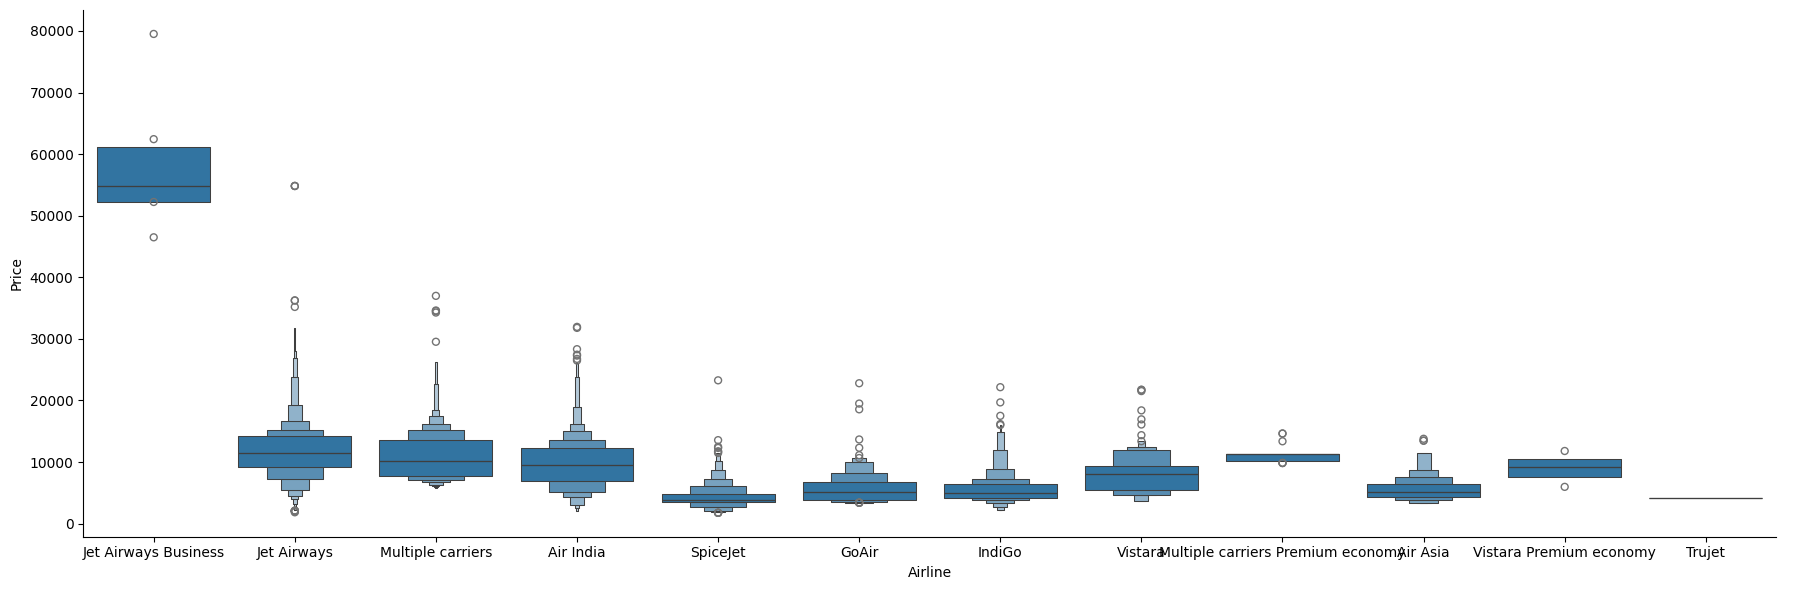

In [27]:
sns.catplot(y='Price' , x='Airline' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [28]:
Airline = flight['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [29]:
flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

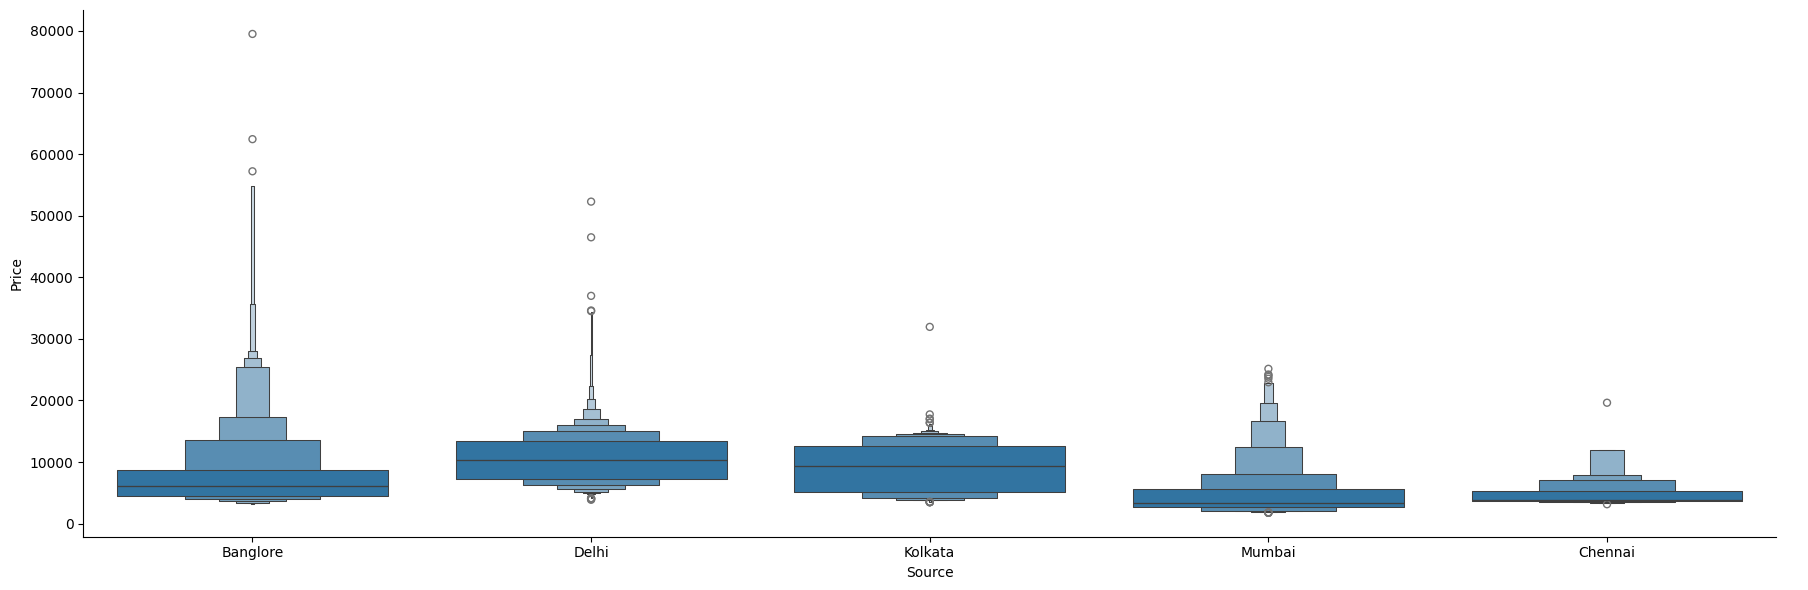

In [30]:
sns.catplot(y='Price' , x='Source' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [31]:
flight['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [32]:
Source = flight[['Source']]

Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [33]:
flight['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [34]:
Destination = flight[['Destination']]

Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [35]:
flight['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [36]:
flight.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

In [37]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [38]:
flight['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [39]:
flight.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\1174757405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flight.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)


In [40]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [41]:
flight = pd.concat( [flight , Airline ,Source , Destination] , axis=1)

In [42]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [43]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [44]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [45]:
flight.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

In [46]:
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [47]:
flight.shape

(10682, 30)

## Test Data

In [48]:
flight_test = pd.read_excel('Data_Test.xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:


print("-"*50)
print("Shape")
print(flight_test.shape)

print("-"*50)
print("Info")
print(flight_test.info())

print("-"*50)
print("Duration count values")
print(flight_test['Duration'].value_counts())

print("-"*50)
print("Check null value")
print(flight_test.isnull().sum())

print("-"*50)
print("Drop null value rows")
flight_test.dropna(inplace=True)

print("-"*50)
print("Check null values")
print(flight_test.isnull().sum())

print("-"*50)
print("Fetch journey day and month from Date_of_Journey")
flight_test['Journey_Day'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight_test['Journey_Month'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.month
print(flight_test.head())

print("-"*50)
print("Fetch Departure hours and minutes from Dep_Time")
flight_test['Dep_hour'] = pd.to_datetime(flight_test.Dep_Time ).dt.hour
flight_test['Dep_Minute'] = pd.to_datetime(flight_test.Dep_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Dep_time and Date_of_Journey columns")
flight_test.drop(columns=['Dep_Time' , 'Date_of_Journey'],inplace=True)

print("-"*50)
print("Fetch journey hours and minutes from Arrival_Time")
flight_test['Arrival_hour'] = pd.to_datetime(flight_test.Arrival_Time ).dt.hour
flight_test['Arrival_Minute'] = pd.to_datetime(flight_test.Arrival_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Arrival_Time columns")
flight_test.drop(columns='Arrival_Time',inplace=True)

print("-"*50)
print("Fetch  hours and minutes from Durations")
duration = list(flight_test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

flight_test['Duration_Hour'] = duration_hour
flight_test['Duration_Minute'] = duration_minute
flight_test.drop(columns='Duration',inplace=True)

print("-"*50)
print("Count Airline values")
print(flight_test['Airline'].value_counts())


print("-"*50)
print("OneHotEncoder on Airline Column")
Airline = flight_test['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
print(Airline.head())

print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())


print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())

print("-"*50)
print("OneHotEncoder on Source Column")
Source = flight_test[['Source']]
Source = pd.get_dummies(Source , drop_first=True)
print(Source.head())

print("-"*50)
print("Count Destination values")
print(flight_test['Destination'].value_counts())

print("-"*50)
print("OneHotEncoder on Destination Column")
Destination = flight_test[['Destination']]
Destination = pd.get_dummies(Destination , drop_first=True)
print(Destination.head())

print("-"*50)
print("Show route")
print(flight_test['Route'])

print("-"*50)
print("Drop Route and Additional_Info")
flight_test.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

print("-"*50)
print("Cout Total_Stops")
print(flight_test['Total_Stops'].value_counts())

print("-"*50)
print("Normalize total stops")
flight_test.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

print("-"*50)
print("Concate flight, airline, source and destionation")
flight_test = pd.concat( [flight_test , Airline ,Source , Destination] , axis=1)

print("-"*50)
print("Show all rows and columns")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

print("-"*50)
print("Drop Airline, Source and Destination")
flight_test.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

print("-"*50)
print("Show head")
print(flight_test.head())

print("-"*50)
print("Shape")
print(flight_test.shape)


--------------------------------------------------
Shape
(2671, 10)
--------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
--------------------------------------------------
Duration count values
Duration
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
2h 35m      70
2h 30m   

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2314376658.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_test['Dep_hour'] = pd.to_datetime(flight_test.Dep_Time ).dt.hour
C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2314376658.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_test['Dep_Minute'] = pd.to_datetime(flight_test.Dep_Time ).dt.minute
C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2314376658.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_test['Arrival_hour'] = pd.to_datetime(flight_test.Arrival_Time ).dt.hour
C:\Users\Nith

In [50]:
flight_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [51]:
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Feature selection

In [52]:
flight.shape , flight_test.shape

((10682, 30), (2671, 28))

In [53]:
X = flight.drop(columns='Price',axis=1)
y = flight['Price']
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [54]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

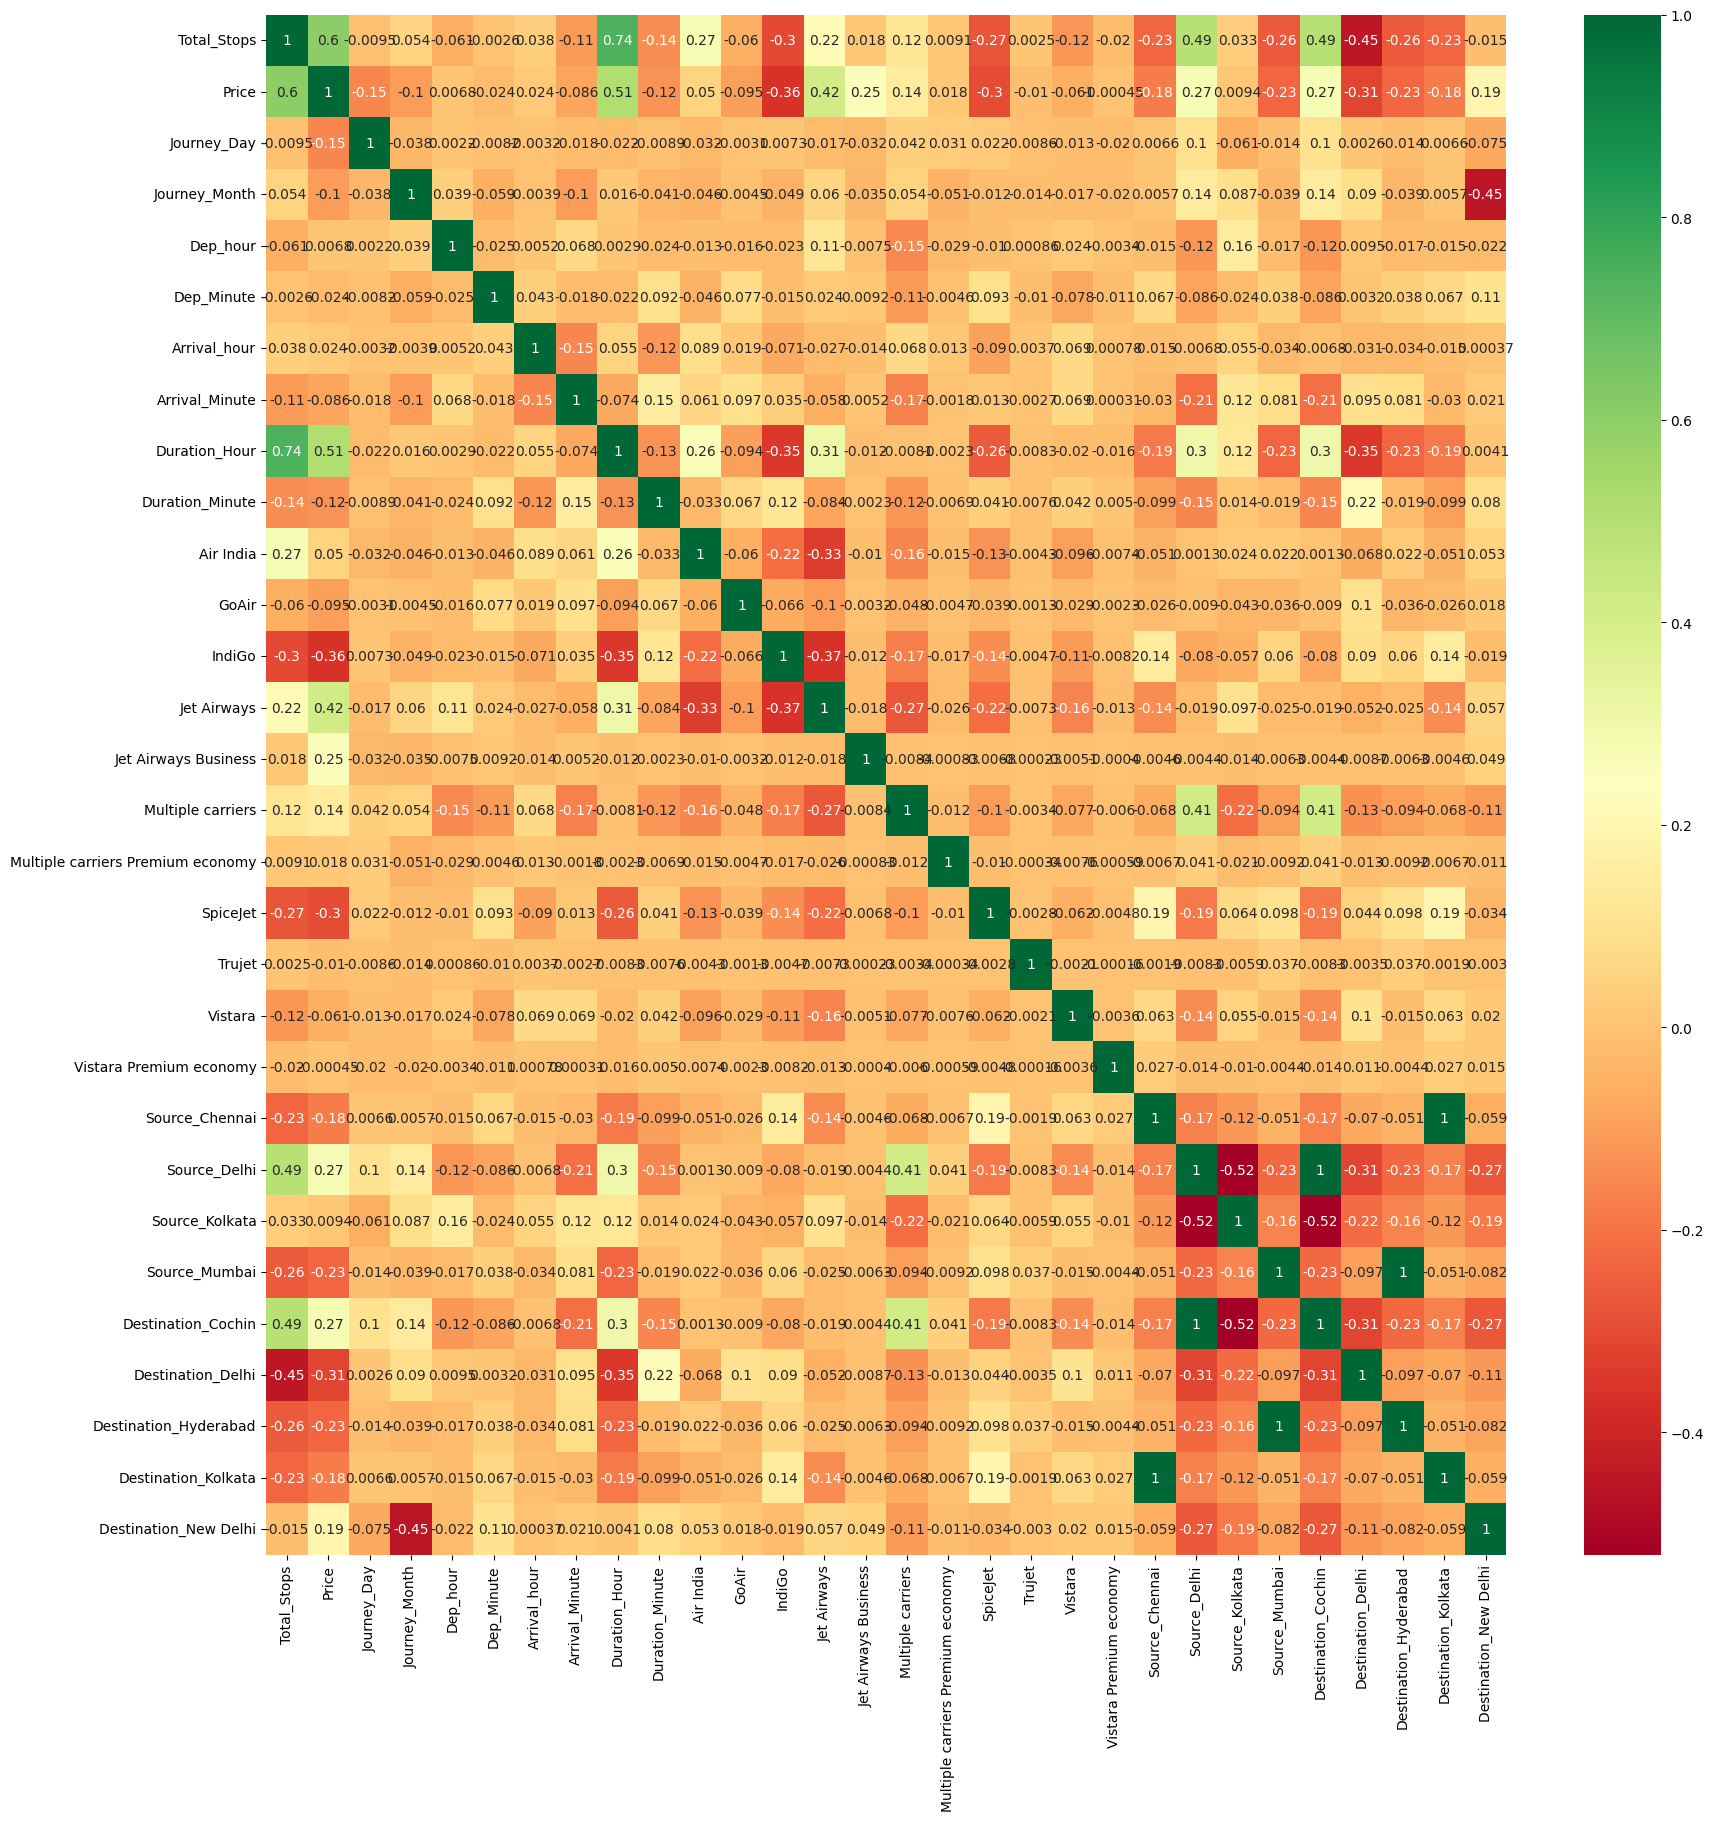

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(flight.corr() , annot=True , cmap = 'RdYlGn')
plt.show()

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

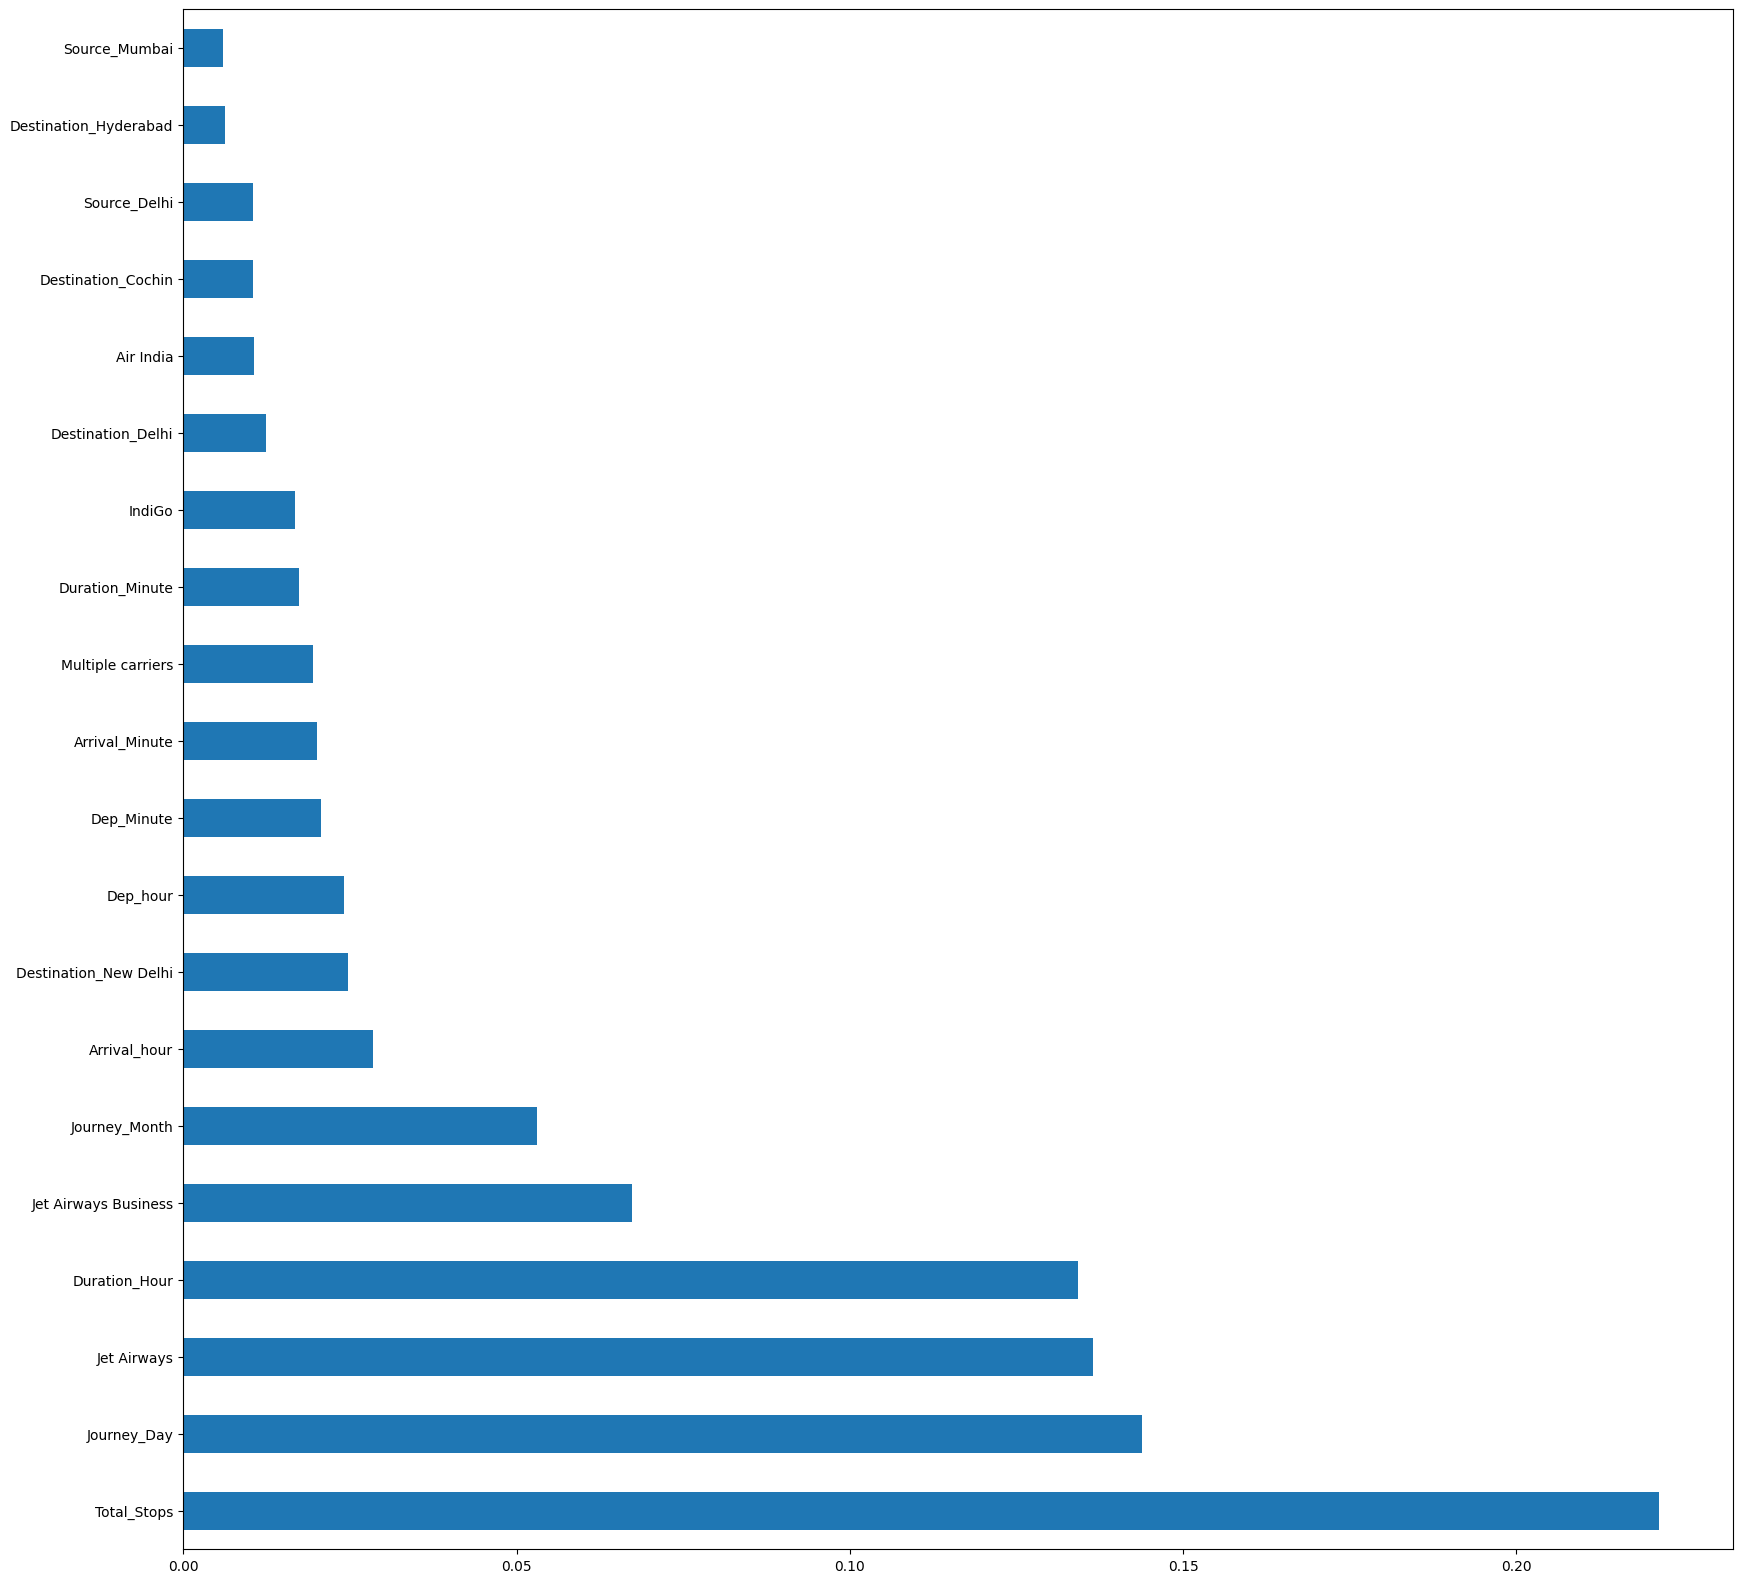

In [57]:
plt.figure(figsize=(20,20))

feat = pd.Series(etr.feature_importances_ , index=X.columns)
feat.nlargest(20).plot(kind='barh')

plt.show()

## Fit model using Random Forest

In [58]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [60]:
pred = rfr.predict(X_test)

In [61]:
rfr.score(X_train , y_train)

0.9538305340348866

In [62]:
rfr.score(X_test , y_test)

0.8302437574718845

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='Price', ylabel='Density'>

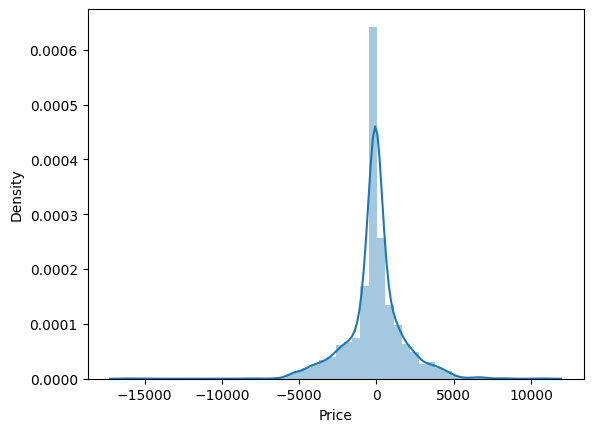

In [63]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

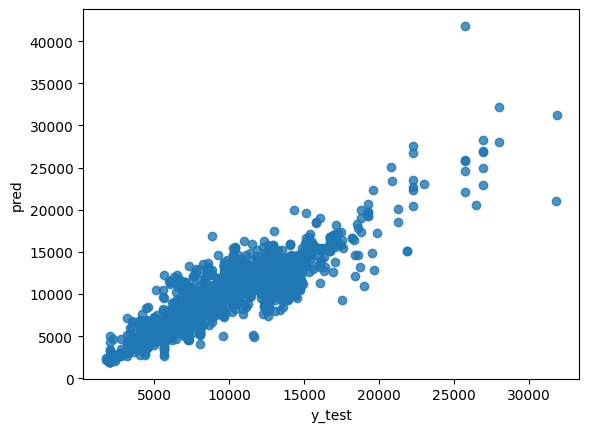

In [64]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [65]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1130.899161674908
MSE: 3182300.70077276
RMSE: 1783.9004178408502


In [66]:
metrics.r2_score(y_test,pred)

0.8302437574718845

## Hyperprameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    
}

random_search


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [68]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [69]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   8.0s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   8.0s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.9s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.9s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   8.1s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=  10.3s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   9.9s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

c:\Flight-Fare-Prediction-using-Machine-Learning-master\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Flight-Fare-Prediction-using-Machine-Learning-master\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Flight-Fare-Prediction-using-Machine-Learning-master\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Flight-Fare-Prediction-using-Machine-Learning-master\venv\Lib\site-

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [70]:
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [71]:
prediction = rfr_random.predict(X_test)

C:\Users\Nithi\AppData\Local\Temp\ipykernel_7768\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


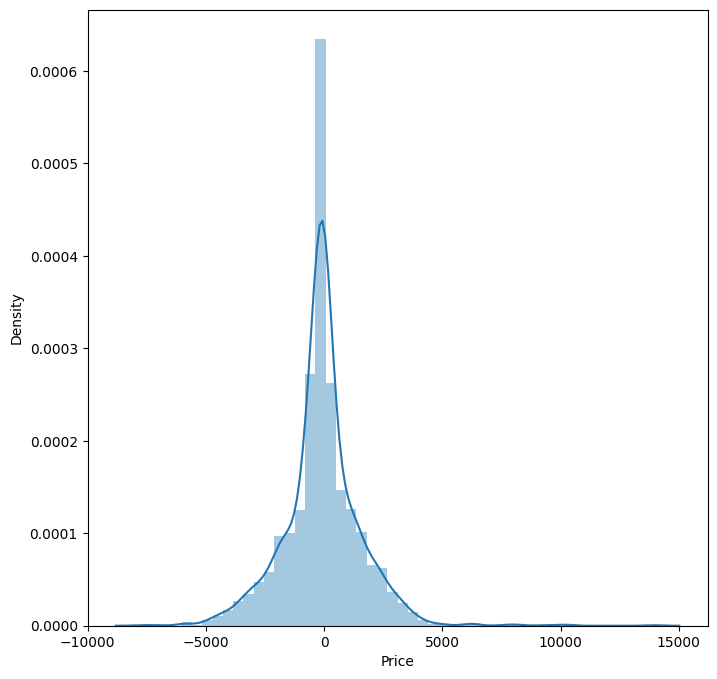

In [72]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

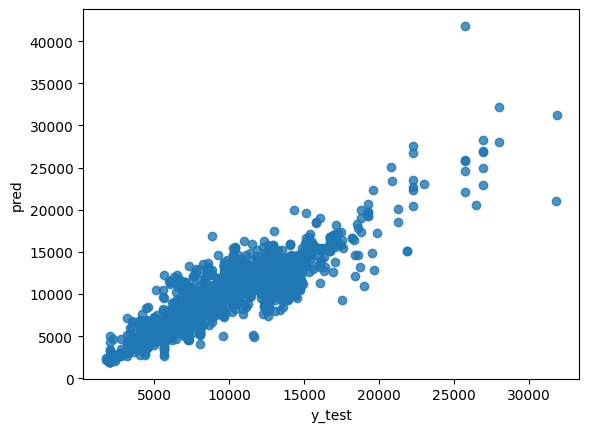

In [73]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1090.129511272497
MSE: 2679279.0955693927
RMSE: 1636.8503583313268


In [75]:
metrics.r2_score(y_test,prediction)

0.8570768777955073

## Save the model

In [76]:
import pickle
file = open('Flight-Fare-Prediction.pkl','wb')
pickle.dump(rfr_random,file)

In [77]:
model = open('Flight-Fare-Prediction.pkl','rb')
mod = pickle.load(model)

In [78]:
predicted_data = mod.predict(X_test)

In [79]:
metrics.r2_score(y_test,predicted_data)

0.8570768777955073